In [34]:
# importing data here
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random

df = pd.read_csv('framingham.csv')
df = df.fillna(0)
x_list = [float(df['glucose'][i]) for i in range(len(df))]
y_list = [float(df['TenYearCHD'][i]) for i in range(len(df))]

print(x_list[:15])
print(y_list[:15])

[77.0, 76.0, 70.0, 103.0, 85.0, 99.0, 85.0, 78.0, 79.0, 88.0, 76.0, 61.0, 64.0, 84.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [35]:
# get stats of glucose & TenYearCHD

print(f'num values: {len(y_list)}')
ten_year_chd_count = sum(y_list) # 644
glucose_avg_0 = 0
glucose_avg_1 = 0

# calculate the average glucose per classification
for i in range(len(y_list)):
    if y_list[i] == 1:
        glucose_avg_1 += x_list[i]
    else:
        glucose_avg_0 += x_list[i]

glucose_avg_0 /= len(y_list) - ten_year_chd_count
glucose_avg_1 /= ten_year_chd_count

print(round(glucose_avg_0, 2))
print(round(glucose_avg_1, 2))

num values: 4238
73.09
82.1


In [ ]:
# defining logistic regression function here
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import random

'''
x_data: 2D array of inputs (each row representing a single data point)
    if 1D array of inputs is passed, the function will automatically convert it into 2D where each row is its own 1D array of size 1
y_data: 1D array of outputs
alpha: used for learning rate of regression model
epochs: number of simulation runs
params: list of 1+n scalars used to get prediction value (y-hat) where n is the # of columns

returns the refined parameters & r^2
'''
def logistic_regression(x_data, y_data, alpha = 0.02, epochs = 100, params = []):

    # prepping data here
    # converts x_data from 1D to 2D if necessary
    if not isinstance(x_data[0], list):
        x_data = [[row] for row in x_data]

    # if no parameters were passed, set them equal to 0
    if len(params) == 0:
        params = [0 for i in range(len(x_data[0]))]
        params.append(0) # adding extra 0 for the bias

    n = len(x_data)

    # return y-hat
    def prediction(input_list):
        polynomial = params[0]

        for i in range(len(input_list)):
            polynomial += params[i + 1] * input_list[i] # coefficient * input

        return 1 / (1 + (math.e**(-1 * polynomial))) # logistic function
    
    # return sum of residuals
    def sum_residuals(multiplier_index = -1):
        multipliers = [1 for i in range(len(x_data))] if multiplier_index == -1 else [row[multiplier_index] for row in x_data]

        sum_error = 0

        for i in range(len(x_data)):
            sum_error += (y_data[i] - prediction(x_data[i]))*multipliers[i]

        return sum_error
    
    # running simulations and updating parameters here
    for epoch in range(epochs):
        params[0] += alpha * sum_residuals() / n # updating bias term

        # updating the coefficient terms
        for i in range(1, len(params)):
            params[i] += alpha * sum_residuals(i - 1) / n

    return params

[np.float64(-0.4189401670114953), np.float64(0.06631313251025128)]


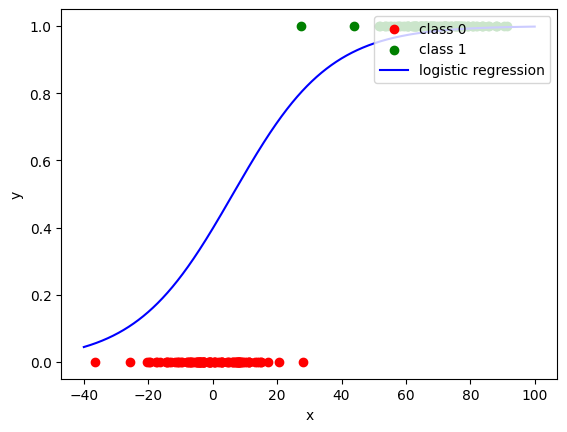

In [107]:
rng = np.random.default_rng()
num_samples = 100

mu_0 = 0
sigma_0 = 10
df_x0 = rng.normal(loc=mu_0, scale=sigma_0, size=num_samples)

mu_1 = 70
sigma_1 = 10
df_x1 = rng.normal(loc=mu_1, scale=sigma_1, size=num_samples)

# creating a combined set for logistic regression
df_x = []
df_y = []

for i in range(len(df_x0)):
    df_x.append(df_x0[i])
    df_y.append(0)

for i in range(len(df_x1)):
    df_x.append(df_x1[i])
    df_y.append(1)

params = logistic_regression(df_x, df_y)
print(params)

x_list = [x/100 for x in range(-4000, 10000)]
y_predict = [1 / (1 + (math.e**(-1 * (params[0] + (x * params[1]))))) for x in x_list]



plt.scatter(df_x0, [0 for i in range(len(df_x0))], color='red', label='class 0')
plt.scatter(df_x1, [1 for i in range(len(df_x1))], color='green', label='class 1')
plt.plot(x_list, y_predict, color='blue', label=f'logistic regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')

plt.show()